In [195]:
import numpy as np
import pandas as pd
import math
# import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import pyart

import astropy.coordinates as coord
from astropy.time import Time
import astropy.units as u

from pysolar.solar import get_altitude, get_azimuth, constants
from pysolar.solar import get_azimuth, get_sun_earth_distance, get_projected_radial_distance
from pysolar import solartime as stime
import pytz


# import boto3
# import botocore
# from botocore.client import Config

# from metpy.io import Level2File
# from metpy.plots import add_timestamp, ctables

import cartopy.crs as ccrs
from datetime import datetime
import time


#  32.5,  33.5
# -97.5, -96.5

/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [211]:
loc = coord.EarthLocation(lon=0 * u.deg,
                          lat=32 * u.deg)
now = Time('2021-04-07 12:00:00', format='iso', scale='utc')#Time.now()

altaz = coord.AltAz(location=loc, obstime=now)
sun = coord.get_sun(now)

temp = sun.transform_to(altaz)
temp.az.degree, temp.zen.degree, temp.distance.meter

/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(178.78518214823447, 24.98835075696975, 149755102427.14777)

In [343]:
folder = "spatial"
node_id = "10004098"
dir_out = "../figures/" + folder + "/"
dir_data = "../data/"

fn_in = dir_data + "driving_" + node_id + ".csv"
df = pd.read_csv(fn_in, index_col = 'UTC')

/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [436]:
df.head()

/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Illuminance,360nm,361nm,362nm,363nm,364nm,365nm,366nm,367nm,368nm,...,775nm,776nm,777nm,778nm,779nm,780nm,Zenith,latitude,longitude,altitude
UTC,,,,,,,,,,,,,,,,,,,,,
2020-01-08 16:43:40,3849.500854,0.042302,0.042491,0.043221,0.044318,0.045591,0.046490,0.047298,0.047995,0.048536,...,0.034481,0.034510,0.034657,0.034848,0.034993,0.035070,61.113035,32.992275,96.757422,226.80
2020-01-08 16:43:50,2345.220551,0.032529,0.032651,0.033183,0.033997,0.034946,0.035627,0.036239,0.036761,0.037158,...,0.029435,0.029525,0.029645,0.029761,0.029830,0.029849,61.096021,32.992279,96.756782,226.74
2020-01-08 16:44:00,2385.540894,0.033112,0.033226,0.033758,0.034580,0.035541,0.036231,0.036851,0.037380,0.037782,...,0.036020,0.036155,0.036332,0.036510,0.036637,0.036706,61.079027,32.991883,96.756719,232.32
2020-01-08 16:44:10,2566.076355,0.033985,0.034098,0.034641,0.035480,0.036463,0.037165,0.037798,0.038343,0.038761,...,0.040529,0.040701,0.040914,0.041126,0.041279,0.041369,61.062055,32.991692,96.757119,226.90
2020-01-08 16:44:20,2944.573364,0.040020,0.040161,0.040814,0.041823,0.043005,0.043871,0.044654,0.045327,0.045841,...,0.039787,0.039932,0.040158,0.040408,0.040604,0.040733,61.045103,32.991671,96.757908,231.32


In [203]:
filename = '/Volumes/Backup Plus/NEXRAD/data/2020-02-10/2020_02_10_KFWS_KFWS20200210_140005_V06'
radar = pyart.io.read(filename)


/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/cartopy/crs.py:2320: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = np.float(self.globe.semimajor_axis or WGS84_SEMIMAJOR_AXIS)
/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/ca

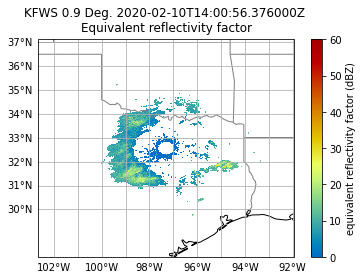

In [204]:
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('reflectivity', sweep=2, resolution='50m',
                     vmin=0, vmax=60,
                     projection=ccrs.PlateCarree())

/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/cartopy/crs.py:2320: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = np.float(self.globe.semimajor_axis or WGS84_SEMIMAJOR_AXIS)
/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/ca

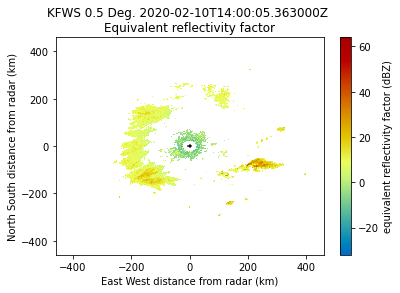

In [205]:
display = pyart.graph.RadarMapDisplay(radar)
fig = plt.figure()

ax = fig.add_subplot(111)
display.plot('reflectivity', 0, vmin=-32, vmax=64.)
# display.plot_range_rings([10, 20, 30, 40])
display.plot_cross_hair(5.)
plt.show()

In [406]:
x_curr, y_curr, z_curr = 10000, 10000, 0
delta_x, delta_y, delta_z = 5000, 5000, 1000

grid = pyart.map.grid_from_radars(radar, grid_shape=(11, 3, 3),\
                                  grid_limits=((z_curr,z_curr+10*delta_z), (x_curr - delta_x, x_curr + delta_x), (y_curr - delta_y, y_curr + delta_y)))


/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/pyart/map/gates_to_grid.py:163: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990.
  warnings.warn("Barnes weighting function is deprecated."


In [435]:
pyart.core.geographic_to_cartesian(radar.longitude['data'][0]+0.5,radar.latitude['data'][0]+0.5,grid.get_projparams())

/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([46589.73281372]), array([55707.38004436]))

In [408]:
pyart.core.cartesian_to_geographic(0,0)


/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: cartesian_to_geographic() missing 1 required positional argument: 'projparams'

/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


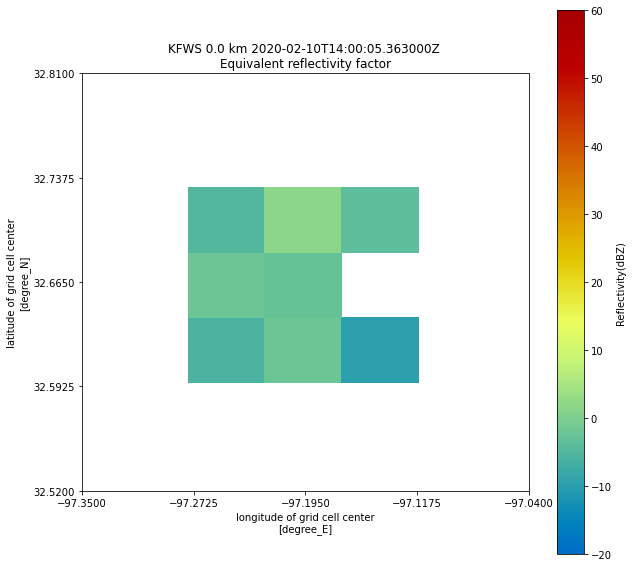

In [407]:
fig = plt.figure(figsize=[10, 10])
display = pyart.graph.GridMapDisplay(grid)
display.plot_grid('reflectivity', level=0, vmin=-20, vmax=60)

In [294]:
(1-radar.fields['velocity']['data'].mask.sum()

/Users/Strawberry/opt/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


207802

In [292]:
radar.fields['velocity']['data'].mask.sum()

/Users/Strawberry/opt/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


11663558

/Users/Strawberry/opt/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


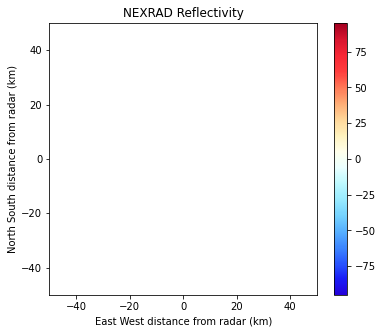

In [278]:
display = pyart.graph.RadarDisplay(radar)
fig = plt.figure(figsize=(6, 5))

# plot super resolution reflectivity
ax = fig.add_subplot(111)
display.plot('velocity', 0, title='NEXRAD Reflectivity', colorbar_label='', ax=ax)
display.plot_range_ring(radar.range['data'][-1]/1000., ax=ax)
display.set_limits(xlim=(-50, 50), ylim=(-50, 50), ax=ax)
plt.show()

In [240]:
grid.fields[]

/Users/Strawberry/opt/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SyntaxError: invalid syntax (<ipython-input-240-2fb8b79bc6e6>, line 1)

/Users/Strawberry/opt/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


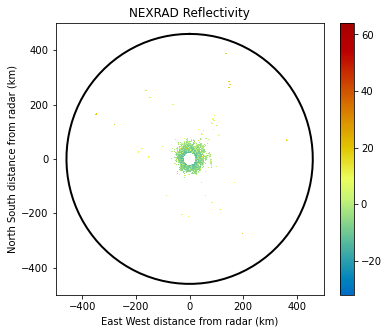

In [6]:
filename = '/Volumes/Backup Plus/NEXRAD/data/2020-01-08/2020_01_08_KFWS_KFWS20200108_191600_V06'
radar = pyart.io.read_nexrad_archive(filename)
display = pyart.graph.RadarDisplay(radar)
fig = plt.figure(figsize=(6, 5))

# plot super resolution reflectivity
ax = fig.add_subplot(111)
display.plot('reflectivity', 0, title='NEXRAD Reflectivity',
             vmin=-32, vmax=64, colorbar_label='', ax=ax)
display.plot_range_ring(radar.range['data'][-1]/1000., ax=ax)
display.set_limits(xlim=(-500, 500), ylim=(-500, 500), ax=ax)
plt.show()

/Users/Strawberry/opt/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/Strawberry/opt/miniconda3/lib/python3.8/site-packages/pyart/map/gates_to_grid.py:160: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990.
  warnings.warn("Barnes weighting function is deprecated."


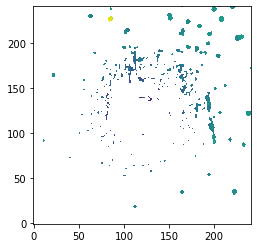

In [125]:
radar = pyart.io.read(filename)

# mask out last 10 gates of each ray, this removes the "ring" around the radar.
radar.fields['reflectivity']['data'][:, -10:] = np.ma.masked

# exclude masked gates from the gridding
gatefilter = pyart.filters.GateFilter(radar)
gatefilter.exclude_transition()
gatefilter.exclude_masked('reflectivity')

# perform Cartesian mapping, limit to the reflectivity field.
grid = pyart.map.grid_from_radars(
    (radar,), gatefilters=(gatefilter, ),
    grid_shape=(1, 241, 241),
    grid_limits=((2000, 2000), (-123000.0, 123000.0), (-123000.0, 123000.0)),
    fields=['reflectivity','velocity'])

# create the plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(grid.fields['reflectivity']['data'][0], origin='lower')
plt.show()

/Users/Strawberry/opt/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


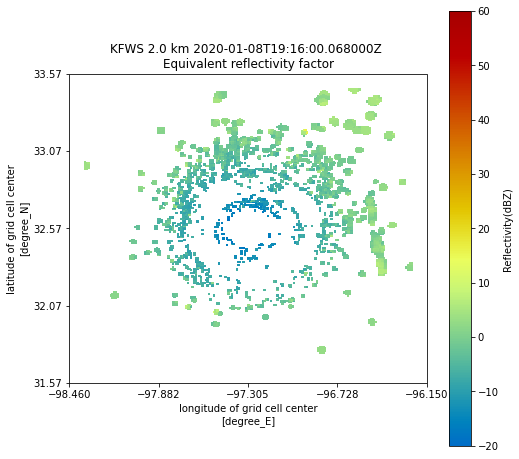

In [126]:
fig = plt.figure(figsize=[8, 8])
display = pyart.graph.GridMapDisplay(grid)
display.plot_grid('reflectivity', level=2, vmin=-20, vmax=60)


In [2]:
R = 6371 * 1000 # radius of earth
def distance(lat1,long1, lat2, long2):
    # dx / R
    dx = math.radians(long1 - long2) * np.cos(math.radians(( lat1 + lat2)/2 ))
    # dy / R
    dy = math.radians(lat1 - lat2)
    # ds = R*sqrt(dx^2 + dy^2)
    h1 = R*np.sqrt(dx*dx + dy*dy)
    return h1

In [3]:
origin_latitude = 32.57861
origin_longitude = -97.303611
R = 6371 * 1000 # radius of earth
def xy2latlong(x, y): # based on origin_latitude, origin_longitude
    dlat_radians = y/R
    lat = origin_latitude + math.degrees(dlat_radians)
    dlon_radians = x/(R*math.cos(origin_latitude))
    long = origin_longitude + math.degrees(dlon_radians)
    
    return lat, long

In [4]:
year = '2020'
month = '02'
day = '01'
hour = '020000'

year_month = year + '-' + month
year_month_day = year_month + '-' + day

file_path = '/Volumes/Backup Plus/NEXRAD/halfyear/'+year_month+'/'+year_month_day+'/'+hour+'/'+year_month_day+'_'+hour+'.nc'
file_obj = nc.Dataset(file_path)


In [5]:
list(file_obj.variables.keys())

['time',
 'x',
 'y',
 'z',
 'origin_latitude',
 'origin_longitude',
 'origin_altitude',
 'projection',
 'ProjectionCoordinateSystem',
 'radar_latitude',
 'radar_longitude',
 'radar_altitude',
 'radar_time',
 'radar_name',
 'reflectivity',
 'velocity',
 'spectrum_width',
 'differential_phase',
 'differential_reflectivity',
 'cross_correlation_ratio',
 'ROI']

In [6]:
lats = []
longs = []
for i in range(len(file_obj['x'][:].data)):
    lat, long = xy2latlong(file_obj['x'][i], file_obj['y'][i])
    lats.append(lat)
    longs.append(long)

(54,)


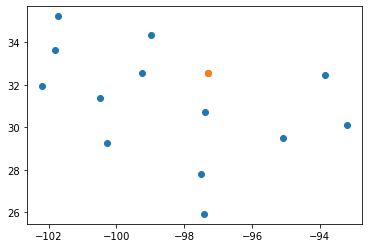

In [20]:
print(file_obj['x'][:].data.shape)
plt.scatter(file_obj['radar_longitude'][:].data, file_obj['radar_latitude'][:].data)
plt.scatter(file_obj['origin_longitude'][:].data, file_obj['origin_latitude'][:].data)
# plt.scatter(longs, lats)
# plt.xlim([-97.5, -96.5])
# plt.ylim([32.5,  33.5])

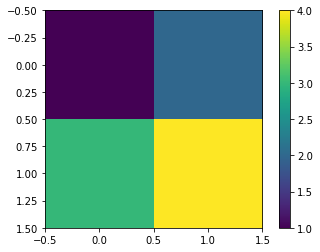

In [9]:
plt.imshow([[1,2],[3,4]])
plt.colorbar()

In [10]:
file_obj['reflectivity']

<class 'netCDF4._netCDF4.Variable'>
float32 reflectivity(time, z, y, x)
    _FillValue: -9999.0
    long_name: Reflectivity
    units: dBZ
    standard_name: equivalent_reflectivity_factor
    valid_max: 94.5
    valid_min: -32.0
    coordinates: elevation azimuth range
unlimited dimensions: time
current shape = (1, 11, 56, 54)
filling on

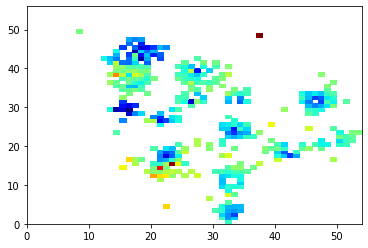

In [11]:
mat = file_obj['reflectivity'][0][0]
plt.pcolormesh(mat[:,:], cmap='jet')
# plt.xlim([-97.5, -96.5])
# plt.ylim([32.5,  33.5])

In [24]:
file_obj['reflectivity'][0][0].shape

(56, 54)

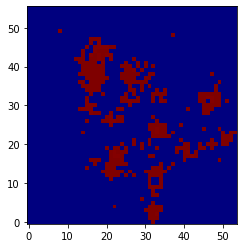

In [12]:
mat = file_obj['reflectivity'][0][0].data
plt.imshow(mat, cmap='jet', origin = 'lower')

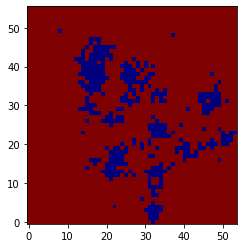

In [13]:
mat = file_obj['reflectivity'][0][0].mask
plt.imshow(mat, cmap='jet', origin = 'lower')

In [14]:
file_obj['time'].units

'seconds since 2020-02-01T02:00:06Z'

In [15]:
for var in file_obj.variables.keys():
    print(var, file_obj[var].shape)

time (1,)
x (54,)
y (56,)
z (11,)
origin_latitude (1,)
origin_longitude (1,)
origin_altitude (1,)
projection ()
ProjectionCoordinateSystem ()
radar_latitude (14,)
radar_longitude (14,)
radar_altitude (14,)
radar_time (14,)
radar_name (14, 4)
reflectivity (1, 11, 56, 54)
velocity (1, 11, 56, 54)
spectrum_width (1, 11, 56, 54)
differential_phase (1, 11, 56, 54)
differential_reflectivity (1, 11, 56, 54)
cross_correlation_ratio (1, 11, 56, 54)
ROI (1, 11, 56, 54)


In [16]:
file_obj['z'][:]

masked_array(data=[    0. ,  1000.1,  2000.2,  3000.3,  4000.4,  5000.5,
                    6000.6,  7000.7,  8000.8,  9000.9, 10001. ],
             mask=False,
       fill_value=1e+20)

In [23]:
for var in [ 'reflectivity',
 'velocity',
 'spectrum_width',
 'differential_phase',
 'differential_reflectivity',
 'cross_correlation_ratio',
 'ROI']:
    print(var)
    print(file_obj[var][0][0].fill_value)


reflectivity
-9999.0
velocity
-9999.0
spectrum_width
-9999.0
differential_phase
-9999.0
differential_reflectivity
-9999.0
cross_correlation_ratio
-9999.0
ROI
1e+20


In [22]:
file_obj['reflectivity'][0][0].fill_value

-9999.0